# Forecasting Model

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import os

%matplotlib inline

In [6]:
df = pd.read_csv("data/processed_data.csv", parse_dates=True, index_col=0)
df = df.drop(index=[df.index[0], df.index[-1]], axis=1)
df = df.dropna()

## Statistical Timeseries models

In [14]:
sns.set()
sub_df = df[df.columns[0]]

In [18]:
splitting_point = int(0.8*len(sub_df))
train = sub_df.iloc[:splitting_point]
test = sub_df.iloc[splitting_point:]

def create_data_plot():
    plt.plot(train, color = "black")
    plt.plot(test, color = "red")
    plt.ylabel(sub_df.name + " [MW]")
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.title(f"Train/Test split for {sub_df.name} data")

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is av

RMSE:  2875.6791132722965


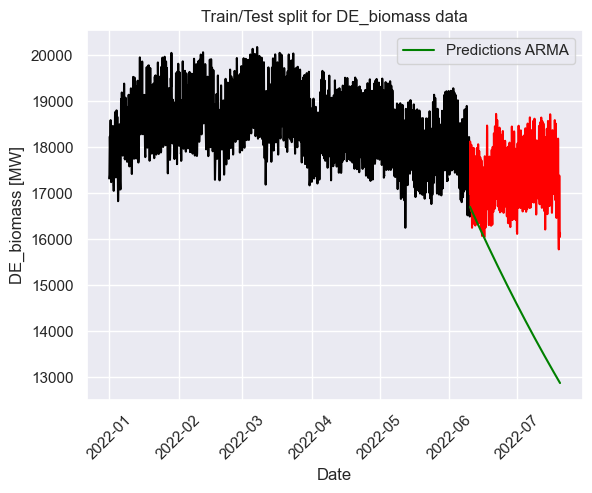

In [19]:
y = train
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
create_data_plot()
plt.plot(y_pred_out, color='green', label = 'Predictions ARMA')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: No

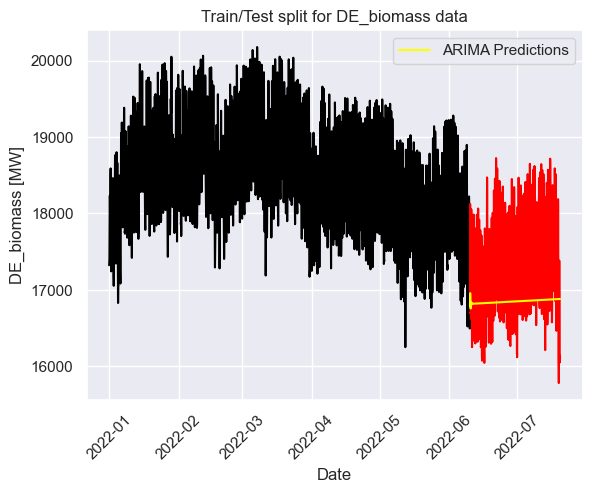

RMSE:  740.1812983305534


In [20]:
ARIMAmodel = ARIMA(sub_df.iloc[:splitting_point], order = (4, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
create_data_plot()
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [27]:
SARIMAXmodel = SARIMAX(y[-400:], order = (4, 2, 3), seasonal_order=(1,1,1,24))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
create_data_plot()
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.plot()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

c:\Users\Thiba\.conda\envs\schneider-hackathon-2023\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Thiba\.conda\envs\schneider-hackathon-2023\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Thiba\.conda\envs\schneider-hackathon-2023\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Thiba\.conda\envs\schneider-hackathon-2023\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  15943.779126121739


## Deep Learning Models

### Classification Model: Predict directly the country with the biggest surplus

In [22]:
dict_country_id = {
    "SP": 0, # Spain
    "UK": 1, # United Kingdom
    "DE": 2, # Germany
    "DK": 3, # Denmark
    "HU": 5, # Hungary
    "SE": 4, # Sweden
    "IT": 6, # Italy
    "PO": 7, # Poland
    "NE": 8 # Netherlands
    }

In [26]:
# Compute the country which has the biggest surplus
def compute_biggest_surplus(row, df, dict_country_id):

    dict_total_consumption = {k: 0 for k in dict_country_id.keys()}
    columns = df.columns
    for country in list(dict_country_id.keys()):
        for column in columns:
            if (country in column):
                if ("Load" in column):
                    dict_total_consumption[country] -= row[column]
                else:
                    dict_total_consumption[country] += row[column] if not np.isnan(row[column]) else 0
    # get country with biggest surplus
    biggest_surplus_country = max(dict_total_consumption, key=dict_total_consumption.get)

    classification_list = [0]*len(dict_country_id)
    classification_list[dict_country_id[biggest_surplus_country]] = 1

    # print(dict_total_consumption, biggest_surplus_country)
    return dict_country_id[biggest_surplus_country]

In [27]:
df["Country_biggest_surplus"] = df.apply(compute_biggest_surplus, axis=1, args=(df, dict_country_id))

The following table shows which countries have the most surplus, but countries from 5 to 8 never show up...

In [28]:
df.groupby("Country_biggest_surplus").count()

,DE_biomass,DE_geothermal,DE_hydro_pumped_storage,DE_hydro_run-of-river_and_poundage,DE_hydro_water_reservoir,DE_other_renewable,DE_solar,DE_wind_offshore,DE_wind_onshore,DK_biomass,...,UK_wind_onshore,DE_Load,DK_Load,HU_Load,IT_Load,NE_Load,PO_Load,SE_Load,SP_Load,UK_Load
Country_biggest_surplus,,,,,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1,1871,1871,1871,1871,1871,1871,1871,1871,1871,1871,...,1871,1871,1871,1871,1871,1871,1871,1871,1871,1871
2,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
3,2612,2612,2612,2612,2612,2612,2612,2612,2612,2612,...,2612,2612,2612,2612,2612,2612,2612,2612,2612,2612
4,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289


Add lags (ie values from previous hours, days, etc)

In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=[1], col=0):
    dataX, dataY = [], []
    offset = max(look_back)
    for i in range(len(dataset)-offset):
        a = []
        for j in range(len(df.columns) - 1):
            for k in look_back:
                a.append(dataset[i + k - 1, j])
        dataX.append(a)
        dataY.append(dataset[i + offset, -1])
    return np.array(dataX), np.array(dataY).astype(np.uint8)

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.values[:train_size, :], df.values[train_size:, :]
look_back = [1, 2, 3, 4, 23, 24, 25, 26, 100, 101, 102]
trainX, trainY = create_dataset(train, look_back, col)
testX, testY = create_dataset(test, look_back, col)

In [11]:
testY

array([3, 3, 3, ..., 3, 3, 2], dtype=uint8)

In [12]:
trainX.shape

(6906, 693)

fit the model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import math

inititalizer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(124, input_dim=len(trainX[0]), activation='relu', kernel_initializer=inititalizer))
model.add(Dense(64, activation='relu', kernel_initializer=inititalizer))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer=inititalizer))
model.add(Dense(len(dict_country_id), kernel_initializer=inititalizer))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(trainX, trainY, epochs=300, verbose=2) # batch_size=2,
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=2)
print("trainScore", trainScore)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=2)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])




Epoch 1/300


c:\ProgramData\anaconda3\envs\schneider-hackathon-2023-py11\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




117/117 - 1s - loss: 50792140.0000 - accuracy: 0.3241 - 850ms/epoch - 7ms/step
Epoch 2/300
117/117 - 0s - loss: 10383739.0000 - accuracy: 0.5405 - 236ms/epoch - 2ms/step
Epoch 3/300
117/117 - 0s - loss: 7235366.0000 - accuracy: 0.5622 - 231ms/epoch - 2ms/step
Epoch 4/300
117/117 - 0s - loss: 5217915.5000 - accuracy: 0.5943 - 252ms/epoch - 2ms/step
Epoch 5/300
117/117 - 0s - loss: 4287840.5000 - accuracy: 0.5978 - 261ms/epoch - 2ms/step
Epoch 6/300
117/117 - 0s - loss: 3414697.0000 - accuracy: 0.6104 - 233ms/epoch - 2ms/step
Epoch 7/300
117/117 - 0s - loss: 3016681.0000 - accuracy: 0.6181 - 220ms/epoch - 2ms/step
Epoch 8/300
117/117 - 0s - loss: 2606239.5000 - accuracy: 0.6149 - 249ms/epoch - 2ms/step
Epoch 9/300
117/117 - 0s - loss: 2232944.2500 - accuracy: 0.6139 - 254ms/epoch - 2ms/step
Epoch 10/300
117/117 - 0s - loss: 1799857.8750 - accuracy: 0.6246 - 231ms/epoch - 2ms/step
Epoch 11/300
117/117 - 0s - loss: 1670996.5000 - accuracy: 0.6136 - 240ms/epoch - 2ms/step
Epoch 12/300
117

In [33]:
probability_model(testX).numpy()[4]

array([2.6712096e-03, 3.8559222e-01, 2.6022971e-03, 5.8461946e-01,
       2.4514599e-02, 4.5492207e-08, 2.5336410e-08, 7.6326330e-08,
       7.7689783e-08], dtype=float32)

Conclusion: The model predict 3 all the time... which has a bad accuracy

In [ ]:
pd.DataFrame(testPredict)[0].unique()

array([3.3639636], dtype=float32)

### Time Series forecasting with Deep Learning

In [34]:
col = 0
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, col=0):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), col]
        dataX.append(a)
        dataY.append(dataset[i + look_back, col])
    return np.array(dataX), np.array(dataY)
 
# load the dataset
dataset = df.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
# reshape dataset
look_back = 5
trainX, trainY = create_dataset(train, look_back, col)
testX, testY = create_dataset(test, look_back, col)

Epoch 1/150
219/219 - 1s - loss: 34600280.0000 - 673ms/epoch - 3ms/step
Epoch 2/150
219/219 - 0s - loss: 566824.1875 - 256ms/epoch - 1ms/step
Epoch 3/150
219/219 - 0s - loss: 542188.6875 - 292ms/epoch - 1ms/step
Epoch 4/150
219/219 - 0s - loss: 507085.5000 - 278ms/epoch - 1ms/step
Epoch 5/150
219/219 - 0s - loss: 461373.8125 - 280ms/epoch - 1ms/step
Epoch 6/150
219/219 - 0s - loss: 395262.2188 - 227ms/epoch - 1ms/step
Epoch 7/150
219/219 - 0s - loss: 311156.4375 - 231ms/epoch - 1ms/step
Epoch 8/150
219/219 - 0s - loss: 223050.9844 - 244ms/epoch - 1ms/step
Epoch 9/150
219/219 - 0s - loss: 157631.7969 - 230ms/epoch - 1ms/step
Epoch 10/150
219/219 - 0s - loss: 124978.3438 - 240ms/epoch - 1ms/step
Epoch 11/150
219/219 - 0s - loss: 108647.1953 - 228ms/epoch - 1ms/step
Epoch 12/150
219/219 - 0s - loss: 100837.5781 - 284ms/epoch - 1ms/step
Epoch 13/150
219/219 - 0s - loss: 101207.3906 - 245ms/epoch - 1ms/step
Epoch 14/150
219/219 - 0s - loss: 86619.0625 - 318ms/epoch - 1ms/step
Epoch 15/150
2

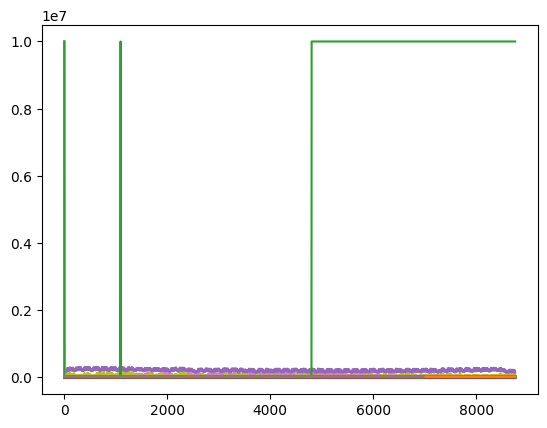

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(64, input_dim=look_back, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=150, verbose=2) # batch_size=2
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

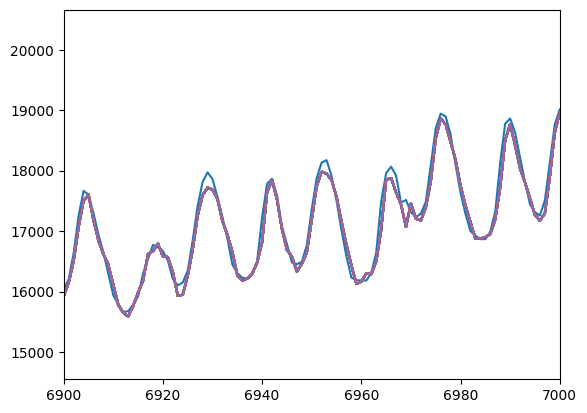

In [39]:
# plot baseline and predictions
plt.figure()
plt.plot(dataset[:, 0])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# zoom on plot
plt.xlim(6900, 7000)

plt.show()

Conclusion: The forecasting is very accurate!
We could do such a forecasting for the green production and the load of each country, and then compute the country that has the most surplus.
This would be great, but unfortunatelly, the initial dataset seems to be wrong (it mostly gives DK as the country with the most surplus)